# Load Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
# #Very Simple trick :D
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
# df = pd.read_csv(url, compression='zip')
# df

In [4]:
# Importing the data without downloading it into pc
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2024-02-28 16:08:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [  <=>               ] 434.15K  1.41MB/s    in 0.3s    

2024-02-28 16:08:39 (1.41 MB/s) - ‘bank-additional.zip’ saved [444572]



In [5]:
!unzip /content/bank-additional.zip

Archive:  /content/bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [34]:
df = pd.read_csv("/content/bank-additional/bank-additional.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [35]:
df.isnull().sum().sum()


0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Removing duplicates
We can use .drop_duplicates()

In [37]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4114    False
4115    False
4116    False
4117    False
4118    False
Length: 4119, dtype: bool

In [38]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


## Quick View for the the data
We can use .describe() and .info()

In [39]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8 non-null      float64
 1   duration        8 non-null      float64
 2   campaign        8 non-null      float64
 3   pdays           8 non-null      float64
 4   previous        8 non-null      float64
 5   emp.var.rate    8 non-null      float64
 6   cons.price.idx  8 non-null      float64
 7   cons.conf.idx   8 non-null      float64
 8   euribor3m       8 non-null      float64
 9   nr.employed     8 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


## Converting data types
Using .astype()

In [40]:
# No need to converting data

The **category** data type is a more memory-efficient way to represent categorical variables with a fixed and relatively small number of unique values.
It internally uses integers to represent the categories, which can significantly reduce memory usage compared to using strings.
It is particularly useful when dealing with large datasets with repetitive categorical data.
It can improve performance in operations involving categorical variables, such as groupby and value_counts.

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

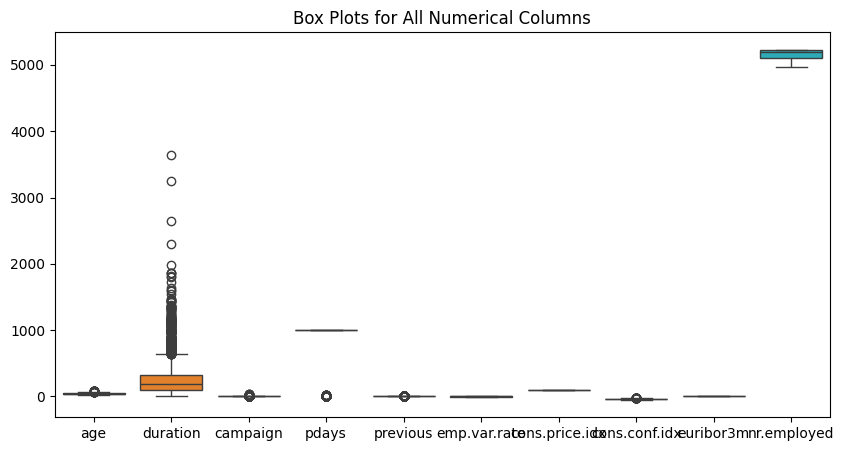

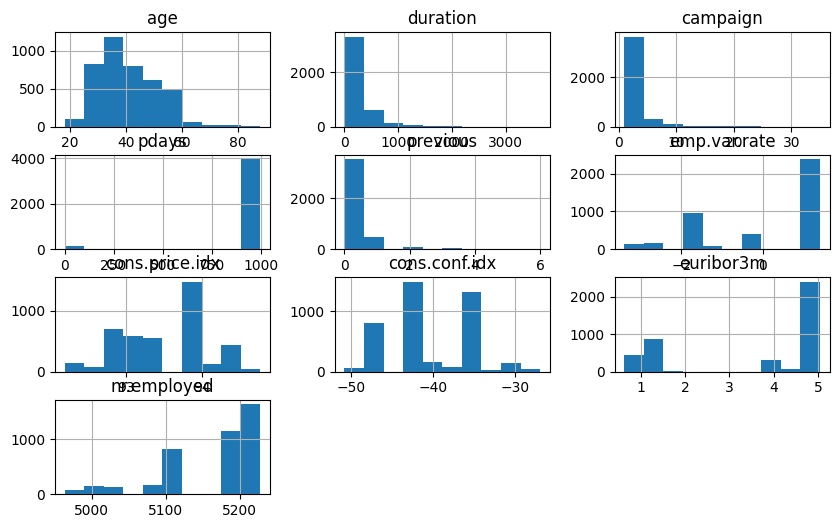

Outliers:
      age         job   marital          education  default housing loan  \
5      32    services    single  university.degree       no      no   no   
21     39  technician  divorced        high.school       no      no   no   
39     20     student    single            unknown       no      no   no   
42     76     retired   married  university.degree       no      no   no   
50     56     retired   married  university.degree       no     yes   no   
...   ...         ...       ...                ...      ...     ...  ...   
4071   70     retired   married           basic.4y  unknown      no   no   
4084   30  unemployed    single        high.school       no      no   no   
4088   47  management   married  university.degree       no     yes   no   
4107   36      admin.   married  university.degree  unknown     yes   no   
4109   63     retired   married        high.school       no      no   no   

       contact month day_of_week  ...  campaign  pdays  previous     poutcome

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Box Plots for All Numerical Columns")
plt.show()

df.hist(figsize=(10, 6), bins=10)
plt.title("Histograms for All Numerical Columns")
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = zscore(df[numeric_cols])
outliers = df[(z_scores > 3).any(axis=1)]

print("Outliers:")
print(outliers)

##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [42]:
df['duration'] = df['duration'].astype(float)

df['campaign'] = df['campaign'].astype(int)

df['pdays'] = df['pdays'].astype(int)

df['previous'] = df['previous'].astype(int)

df['emp.var.rate'] = df['emp.var.rate'].astype(float)

df['cons.price.idx'] = df['cons.price.idx'].astype(float)

df['euribor3m'] = df['euribor3m'].astype(float)

df['nr.employed'] = df['nr.employed'].astype(float)


In [43]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

In [44]:
df['housing'].value_counts()
df['housing'] = df['housing'].replace(['yes', 'no'], ['yes', 'no'])
df['loan'].value_counts()
df['loan'] = df['loan'].replace(['yes', 'no'], ['yes', 'no'])

# Data Preprocessing


## Renaming columns
Using .rename()

In [45]:
df.rename(columns={
    'housing': 'housing_loan',
    'loan': 'personal_loan'
}, inplace=True)


## Changing column order
Using .reindex()


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing_loan    4119 non-null   object 
 6   personal_loan   4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [47]:
df = df.reindex(columns=['job', 'age', 'marital', "education" , "housing_loan" , "default" , 'contact', 'personal_loan', 'month', "duration" , "previous" , "poutcome" ])
df

,job,age,marital,education,housing_loan,default,contact,personal_loan,month,duration,previous,poutcome
0,blue-collar,30,married,basic.9y,yes,no,cellular,no,may,487.0,0,nonexistent
1,services,39,single,high.school,no,no,telephone,no,may,346.0,0,nonexistent
2,services,25,married,high.school,yes,no,telephone,no,jun,227.0,0,nonexistent
3,services,38,married,basic.9y,unknown,no,telephone,unknown,jun,17.0,0,nonexistent
4,admin.,47,married,university.degree,yes,no,cellular,no,nov,58.0,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,30,married,basic.6y,yes,no,cellular,yes,jul,53.0,0,nonexistent
4115,admin.,39,married,high.school,yes,no,telephone,no,jul,219.0,0,nonexistent
4116,student,27,single,high.school,no,no,cellular,no,may,64.0,1,failure
4117,admin.,58,married,high.school,no,no,cellular,no,aug,528.0,0,nonexistent


## Dropping unnecessary columns
 Use .drop() in pandas.

In [48]:
df.drop(['education'], axis=1)

,job,age,marital,housing_loan,default,contact,personal_loan,month,duration,previous,poutcome
0,blue-collar,30,married,yes,no,cellular,no,may,487.0,0,nonexistent
1,services,39,single,no,no,telephone,no,may,346.0,0,nonexistent
2,services,25,married,yes,no,telephone,no,jun,227.0,0,nonexistent
3,services,38,married,unknown,no,telephone,unknown,jun,17.0,0,nonexistent
4,admin.,47,married,yes,no,cellular,no,nov,58.0,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,30,married,yes,no,cellular,yes,jul,53.0,0,nonexistent
4115,admin.,39,married,yes,no,telephone,no,jul,219.0,0,nonexistent
4116,student,27,single,no,no,cellular,no,may,64.0,1,failure
4117,admin.,58,married,no,no,cellular,no,aug,528.0,0,nonexistent


## Encoding categorical variables


In [49]:
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.head()


,age,duration,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,30,487.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,39,346.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,25,227.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,38,17.0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,47,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

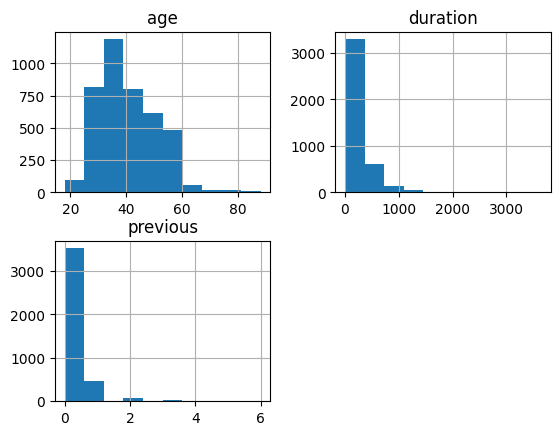

In [50]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df.hist(numeric_cols)

## Box plots
Use .boxplot() in pandas to visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

<Axes: >

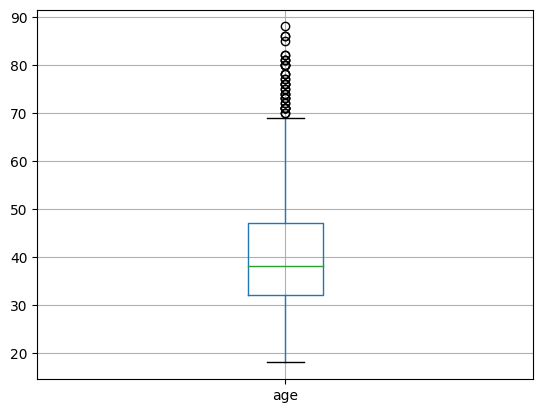

In [51]:
df.boxplot(column=['age'], grid=True)

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

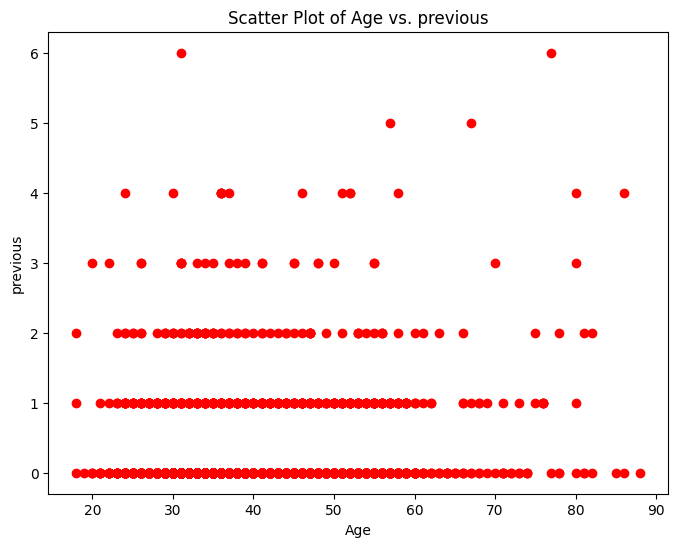

In [52]:

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['previous'], color='red')
plt.title('Scatter Plot of Age vs. previous')
plt.xlabel('Age')
plt.ylabel('previous')
plt.show()


## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

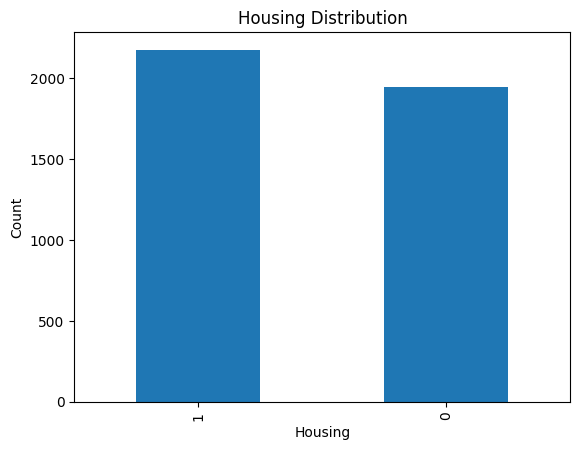

In [53]:
import matplotlib.pyplot as plt
df['housing_loan_yes'].value_counts().plot(kind='bar')
plt.title('Housing Distribution')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.show()


## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

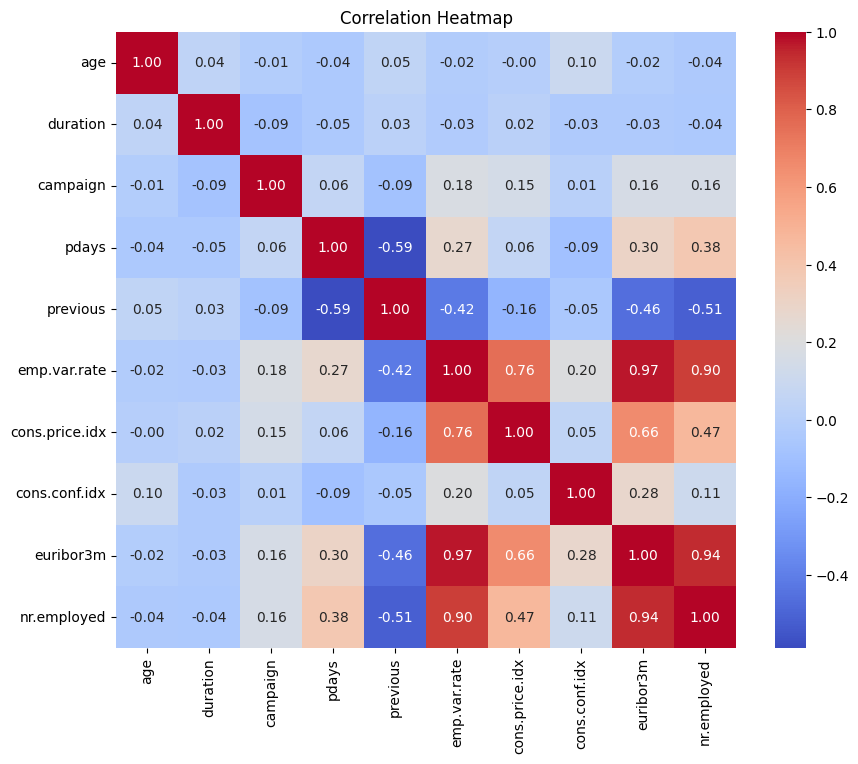

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("/content/bank-additional/bank-additional.csv",sep=";")

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
